In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
import os
from sklearn import svm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

def read_csv(filename):
    with open(filename, newline='') as f:
        reader = csv.DictReader(f)
        for r in reader:
            print(r)

In [2]:
heart_clean_file = "clean_data/heart_clean.csv"
#heart_clean_file = "heart_clean.csv"
data = pd.read_csv(heart_clean_file)

print(data.head())
print(data.describe())
print(data['restecg'].unique())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0    1        0    150.0      0      2.3   
1   37    1   2     130.0  250.0    0        1    187.0      0      3.5   
2   41    0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56    1   1     120.0  236.0    0        1    178.0      0      0.8   
4   57    0   0     120.0  354.0    0        1    163.0      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  
              age         sex          cp    trestbps        chol         fbs  \
count  867.000000  867.000000  867.000000  867.000000  867.000000  867.000000   
mean    53.122261    0.778547    2.486736  132.111649  200.333103    0.137255   
std      9.410392    0.415465    1.468136   18.991719  109.531507    0.344315   
min     28.000000    0.000000    0.000000    0.0000

cumulative variances:  [19.14 33.23 42.23 50.85 58.58 65.92 72.47 78.44 83.8  89.03 93.21 97.01
 99.99]
discrete variances:  [19.14 14.09  9.    8.62  7.73  7.34  6.55  5.97  5.36  5.23  4.18  3.8
  2.98]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


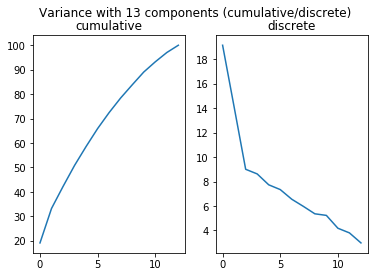

In [3]:

X = data.iloc[:, 0:13].values # data
Y = data.iloc[:, 13].values   # label

scaled_X = scale(X)

def displayVarRatio(pca):
    ratio = pca.explained_variance_ratio_
    var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
    var2 = np.round(pca.explained_variance_ratio_, decimals=4) * 100
    print("cumulative variances: ", var1)
    print("discrete variances: ", var2)
    fig, axs = plt.subplots(1, 2)
    fig.suptitle("Variance with 13 components (cumulative/discrete)")
    axs[0].plot(var1)
    axs[0].set_title("cumulative")
    
    axs[1].plot(var2)
    axs[1].set_title("discrete")
    fig.show()
    

pca = PCA(n_components=13)
pca.fit(scaled_X)
displayVarRatio(pca)
        #plt.waitforbuttonpress()

# 13 components
x_13c = pca.fit_transform(scaled_X)


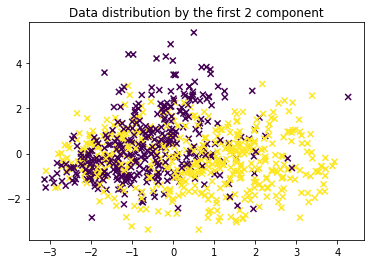

In [4]:
pca2 = PCA(n_components=4)
pca2.fit(scaled_X)
# 4 components
x_4c = pca2.fit_transform(scaled_X)

plt.title("Data distribution by the first 2 component")
plt.scatter(x_4c[:,0], x_4c[:,1], c=Y, marker='x')
plt.show()

In [5]:
l_acc = []
n_acc = []
k_acc = []
r_acc = []
s_acc = []

for i in range(2, 14):
    pca = PCA(n_components=i)
    pca.fit(scaled_X)
        #plt.waitforbuttonpress()

# 13 components
    x_c = pca.fit_transform(scaled_X)
    X_train, X_test, y_train, y_test = train_test_split(x_c, Y, test_size=.3, 
                                                        stratify=Y, 
                                                        random_state=42)
    print("=== PCA fitting result: {} components ===".format(i))
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc = accuracy_score(y_test, preds.argmax(axis=1))
    print('Logistic Regression Accuracy: {:.5f}'.format(acc))
    l_acc.append(acc)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    preds_n = neigh.predict_proba(X_test)
    acc = accuracy_score(y_test, preds_n.argmax(axis=1))
    print('KNN Accuracy: {:.5f}'.format(acc))
    n_acc.append(acc)

    kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
    preds_k = kmeans.predict(X_test)
    acc = accuracy_score(y_test, preds_k)
    print('KMeans Accuracy: {:.5f}'.format(accuracy_score(y_test, preds_k)))
    k_acc.append(acc)

    ridge = Ridge()
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse_score = np.sqrt(mean_squared_error(y_pred, y_test))
    print('Ridge regression rsme: {:.5f}'.format(rmse_score))
    r_acc.append(rmse_score)

    
    svc = svm.SVC(kernel='linear')
    svc.fit(X_train, y_train)
    preds = svc.predict(X_test)
    svc_acc = accuracy_score(y_test, preds)
    print('SVM: {:.5f}'.format(svc_acc))
    s_acc.append(svc_acc)

=== PCA fitting result: 2 components ===
Logistic Regression Accuracy: 0.62069
KNN Accuracy: 0.65900
KMeans Accuracy: 0.28352
Ridge regression rsme: 0.46072
SVM: 0.65900
=== PCA fitting result: 3 components ===
Logistic Regression Accuracy: 0.62069
KNN Accuracy: 0.68199
KMeans Accuracy: 0.28736
Ridge regression rsme: 0.45758
SVM: 0.66667
=== PCA fitting result: 4 components ===
Logistic Regression Accuracy: 0.68582
KNN Accuracy: 0.73946
KMeans Accuracy: 0.27969
Ridge regression rsme: 0.43149
SVM: 0.70115
=== PCA fitting result: 5 components ===
Logistic Regression Accuracy: 0.77395
KNN Accuracy: 0.76628


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KMeans Accuracy: 0.27586
Ridge regression rsme: 0.42226
SVM: 0.77778
=== PCA fitting result: 6 components ===
Logistic Regression Accuracy: 0.77011
KNN Accuracy: 0.77395
KMeans Accuracy: 0.54406
Ridge regression rsme: 0.42071
SVM: 0.77395
=== PCA fitting result: 7 components ===
Logistic Regression Accuracy: 0.76245
KNN Accuracy: 0.77011
KMeans Accuracy: 0.26820
Ridge regression rsme: 0.41886
SVM: 0.77011
=== PCA fitting result: 8 components ===
Logistic Regression Accuracy: 0.75096
KNN Accuracy: 0.77011
KMeans Accuracy: 0.28736
Ridge regression rsme: 0.42013
SVM: 0.76628
=== PCA fitting result: 9 components ===
Logistic Regression Accuracy: 0.75096
KNN Accuracy: 0.78544


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KMeans Accuracy: 0.27969
Ridge regression rsme: 0.42026
SVM: 0.77778
=== PCA fitting result: 10 components ===
Logistic Regression Accuracy: 0.76245
KNN Accuracy: 0.76628
KMeans Accuracy: 0.27969
Ridge regression rsme: 0.41186
SVM: 0.77011
=== PCA fitting result: 11 components ===
Logistic Regression Accuracy: 0.77778
KNN Accuracy: 0.79310
KMeans Accuracy: 0.54789
Ridge regression rsme: 0.41084
SVM: 0.77778
=== PCA fitting result: 12 components ===
Logistic Regression Accuracy: 0.78161
KNN Accuracy: 0.80460
KMeans Accuracy: 0.27203
Ridge regression rsme: 0.40945
SVM: 0.78544
=== PCA fitting result: 13 components ===
Logistic Regression Accuracy: 0.77778
KNN Accuracy: 0.81609


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KMeans Accuracy: 0.27203
Ridge regression rsme: 0.40855
SVM: 0.78544


Text(0.5, 1.0, 'SVM')

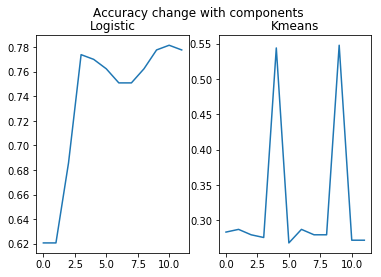

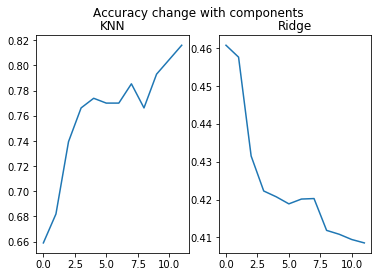

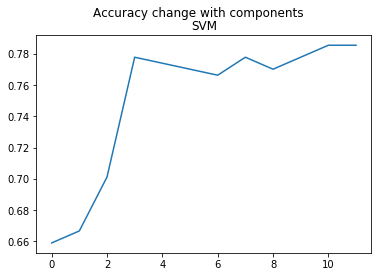

In [6]:
fig, axs = plt.subplots(1, 2)
fig.suptitle("Accuracy change with components")
axs[0].plot(l_acc)
axs[0].set_title("Logistic")

axs[1].plot(k_acc)
axs[1].set_title("Kmeans")
#fig.show()

fig, axs = plt.subplots(1, 2)
fig.suptitle("Accuracy change with components")
axs[0].plot(n_acc)
axs[0].set_title("KNN")

axs[1].plot(r_acc)
axs[1].set_title("Ridge")
#ig.show()

fig, axs = plt.subplots(1, 1)
fig.suptitle("Accuracy change with components")
axs.plot(s_acc)
axs.set_title("SVM")

#ig.show()



In [7]:
# prediction traning on 13 component
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, 
                                                    stratify=Y, 
                                                    random_state=42)

In [8]:
print("=== PCA fitting result: Original Data ===".format(i))
clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
acc1 = accuracy_score(y_test, preds.argmax(axis=1))
print('Logistic Regression Accuracy: {:.5f}'.format(acc))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
preds_n = neigh.predict_proba(X_test)
acc2 = accuracy_score(y_test, preds_n.argmax(axis=1))
print('KNN Accuracy: {:.5f}'.format(acc2))

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
preds_k = kmeans.predict(X_test)
acc3 = accuracy_score(y_test, preds_k)
print('KMeans Accuracy: {:.5f}'.format(accuracy_score(y_test, preds_k)))

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse_score = np.sqrt(mean_squared_error(y_pred, y_test))
print('Ridge regression rsme: {:.5f}'.format(rmse_score))

svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
svc_acc = accuracy_score(y_test, preds)
print('SVM: {:.5f}'.format(svc_acc))

=== PCA fitting result: Original Data ===
Logistic Regression Accuracy: 0.27203
KNN Accuracy: 0.58621
KMeans Accuracy: 0.47893
Ridge regression rsme: 0.40852


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVM: 0.78161


NameError: name 'arr1' is not defined

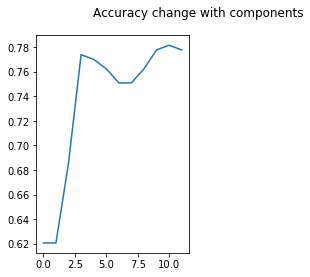

In [14]:
plt.figure()

plt.suptitle("Accuracy change with components")
plt.subplot(121)
plt.plot(l_acc)
plt.plot([acc1]*13)
plt.title("Logistic")

plt.subplot(122)
plt.plot(k_acc)
plt.plot([acc2] * 13)
plt.title("Kmeans")

plt.figure()
plt.subplot(121)
plt.plot(n_acc)
plt.plot([acc3] * 13)
plt.title("KNN")


#ig.show()
plt.subplot(122)
plt.plot(s_acc)
plt.plot([svc_acc] * 13)
plt.title("SVM")

In [15]:
# prediction traning on 13 component
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, 
                                                    stratify=Y, 
                                                    random_state=42)

In [19]:
#SVM
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
linear_acc = accuracy_score(y_test, preds)
print(linear_acc)

from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
rbf_acc = accuracy_score(y_test, preds)
print(rbf_acc)

from sklearn import svm
svc = svm.SVC(kernel='poly')
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
poly_acc = accuracy_score(y_test, preds)
print(poly_acc)

from sklearn import svm
svc = svm.SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
sig_acc = accuracy_score(y_test, preds)
print(sig_acc)

0.7816091954022989
0.5478927203065134
0.5440613026819924
0.5900383141762452


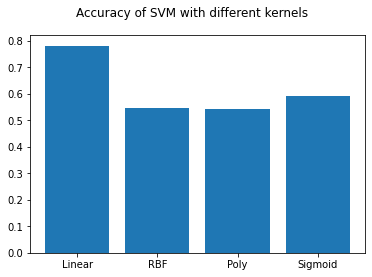

In [20]:
fig, ax = plt.subplots()
fig.suptitle("Accuracy of SVM with different kernels")
x = [1, 2, 3, 4]
money = [linear_acc, rbf_acc, poly_acc, sig_acc]
plt.bar(x, money)
plt.xticks(x, ('Linear', 'RBF', 'Poly', 'Sigmoid'))
plt.show()